In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# Impor data dari file CSV
file_path = '/content/Student_Performance.csv'
data = pd.read_csv(file_path)

# Extract relevant columns
NL = data['Sample Question Papers Practiced'].values
NT = data['Performance Index'].values

# Reshape NL for sklearn
NL_reshaped = NL.reshape(-1, 1)

In [22]:
# Model Linear (Metode 1)
linear_model = LinearRegression()
linear_model.fit(NL_reshaped, NT)
NT_pred_linear = linear_model.predict(NL_reshaped)

# Model Eksponensial (Metode 3)
# y = Ce^(bX) => log(y) = log(C) + b*X
log_NT = np.log(NT)
exp_model = LinearRegression()
exp_model.fit(NL_reshaped, log_NT)
log_C = exp_model.intercept_
b = exp_model.coef_[0]
C = np.exp(log_C)
NT_pred_exp = C * np.exp(b * NL)

# Model Power (Metode Opsional)
# y = Cx^b => log(y) = log(C) + b*log(x)
# Remove non-positive values for log transformation
NL_positive = NL[NL > 0]
NT_positive = NT[NL > 0]

# Transform to log scale
log_NL = np.log(NL_positive)
log_NT = np.log(NT_positive)

# Fit power model
power_model = LinearRegression()
power_model.fit(log_NL.reshape(-1, 1), log_NT)
log_C_power = power_model.intercept_
b_power = power_model.coef_[0]
C_power = np.exp(log_C_power)
NT_pred_log_power = power_model.predict(log_NL.reshape(-1, 1))
NT_pred_power = np.exp(NT_pred_log_power)

# Prepare NL and NT with filtered zero values for plotting and comparison
NL_filtered = NL[NL > 0]

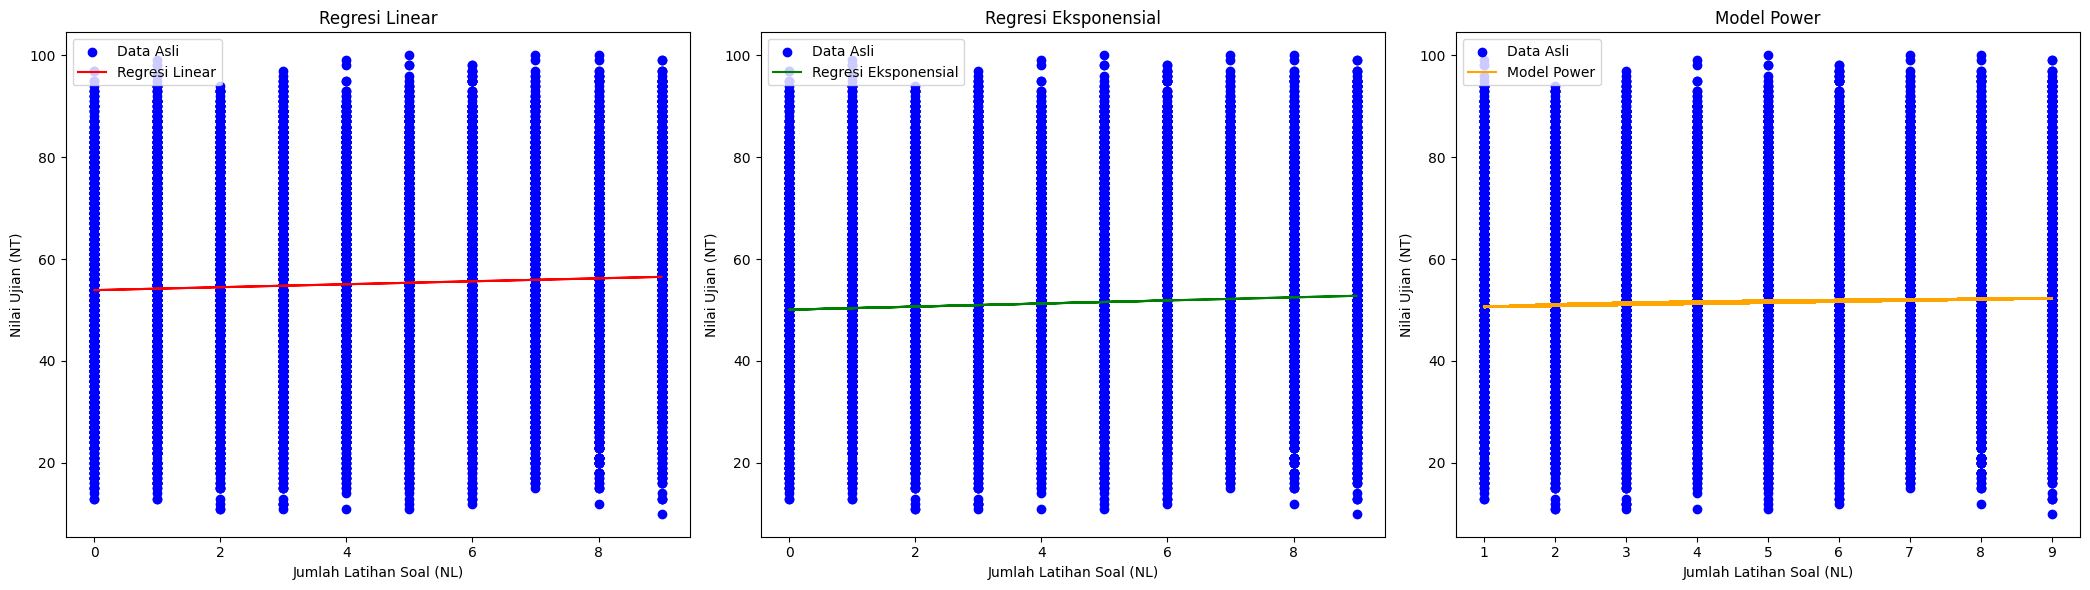

In [24]:
# Plot data dan hasil regresi
plt.figure(figsize=(21, 6))

# Plot Model Linear
plt.subplot(1, 3, 1)
plt.scatter(NL, NT, color='blue', label='Data Asli')
plt.plot(NL, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()

# Plot Model Eksponensial
plt.subplot(1, 3, 2)
plt.scatter(NL, NT, color='blue', label='Data Asli')
plt.plot(NL, NT_pred_exp, color='green', label='Regresi Eksponensial')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Eksponensial')
plt.legend()

# Plot Model Power
plt.subplot(1, 3, 3)
plt.scatter(NL_filtered, NT_positive, color='blue', label='Data Asli')
plt.plot(NL_filtered, NT_pred_power, color='orange', label='Model Power')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Model Power')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Hitung galat RMS
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
rms_exp = np.sqrt(mean_squared_error(NT, NT_pred_exp))
rms_power = np.sqrt(mean_squared_error(NT_positive, NT_pred_power))

print(f"RMS galat - Regresi Linear: {rms_linear}")
print(f"RMS galat - Regresi Eksponensial: {rms_exp}")
print(f"RMS galat - Model Power: {rms_power}")

RMS galat - Regresi Linear: 19.19360524526426
RMS galat - Regresi Eksponensial: 19.562797346139128
RMS galat - Model Power: 19.565035257712687
